In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib
from matplotlib import pyplot as plt
# # SciKitLearn is a useful machine learning utilities library
# import sklearn
# # The sklearn dataset module helps generating |datasets
# import sklearn.datasets
# import sklearn.linear_model
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import normalize
# from scipy.stats import gaussian_kde
import pandas as pd
import network as nn

In [2]:
# Import Dataset
qcd_raw = pd.read_csv('../HiggsReconstruction/EventPlotting/qcd_outputDataForLearning.csv')
hh_raw = pd.read_csv('../HiggsReconstruction/EventPlotting/dihiggs_outputDataForLearning.csv')

In [3]:
qcd_raw.head()
print(len(qcd_raw), "rows of qcd data")
hh_raw.head()
print(len(hh_raw), "rows of dihiggs data")

1703 rows of qcd data
4605 rows of dihiggs data


In [4]:
# Make higgs and qcd sets from raw data
hh_all = hh_raw[['h1_mass', 'h2_mass', 'deltaR(h1 jets)', 'deltaR(h2 jets)']]
qcd = qcd_raw[['h1_mass', 'h2_mass', 'deltaR(h1 jets)', 'deltaR(h2 jets)']]

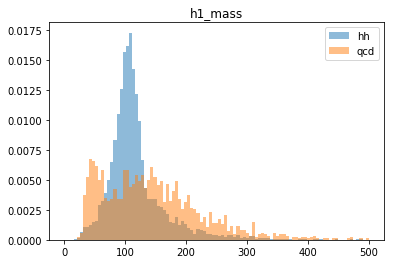

In [5]:
plt.hist(hh_raw['h1_mass'], label="hh", density=1, alpha=.5, bins=np.linspace(0, 500, 100))
plt.hist(qcd_raw['h1_mass'], label="qcd", density=1, alpha=.5, bins=np.linspace(0, 500, 100))
plt.title("h1_mass")
plt.legend()
plt.show()

In [6]:
hh_all = np.array(hh_all)
qcd = np.array(qcd)

In [7]:
# add labels to di-higgs
hh_all=hh_all[:,:4]
# print(hh[0:3])
hh_labels= np.zeros((len(hh_all),1))
hh_labels = hh_labels+1
#a = hh[:len(hh)]
# print(a.shape)
hh_all = np.append(hh_all, hh_labels, axis=1)
# print(hh.shape)
# print(hh[0:3])

In [8]:
# add labels to qcd
qcd=qcd[:,:4]
# print(hh[0:3])
qcd_labels= np.zeros((len(qcd),1))
#a = hh[:len(hh)]
# print(a.shape)
qcd = np.append(qcd, qcd_labels, axis=1)
# print(hh.shape)
# print(hh[0:3])
# print(qcd[:4])

In [9]:
# select a quarter of hh events so that the set is half and half
# we shuffle the list first to take a random 1/4. this means we have a different dataset every time
# np.random.seed(0)
# np.random.shuffle(hh_all) 
hh = hh_all[0:len(qcd)]

In [10]:
print(hh[:4])
print(qcd[:4])

[[148.29183647 158.29664593   2.39941158   3.04517197   1.        ]
 [ 96.55363983  58.55460135   1.3437355    1.1183898    1.        ]
 [110.27188042 130.16422715   0.69737734   1.15238492   1.        ]
 [179.64052569 166.13619263   2.05337635   2.09055659   1.        ]]
[[124.32560775 111.57092015   2.30806958   1.8907895    0.        ]
 [ 44.27017863  50.02795445   0.53594587   0.67197657   0.        ]
 [ 26.86431539  97.05075322   0.50002477   1.24722521   0.        ]
 [ 52.99052297  68.4701516    0.85636988   1.41845491   0.        ]]


In [11]:
all_data = np.append(hh,qcd, axis=0) 
all_data[:4,:]

array([[148.29183647, 158.29664593,   2.39941158,   3.04517197,
          1.        ],
       [ 96.55363983,  58.55460135,   1.3437355 ,   1.1183898 ,
          1.        ],
       [110.27188042, 130.16422715,   0.69737734,   1.15238492,
          1.        ],
       [179.64052569, 166.13619263,   2.05337635,   2.09055659,
          1.        ]])

In [12]:
np.random.seed(0)
for i in range (8): # shuffle 8 times
    np.random.shuffle(all_data) 
print(all_data[:4])
all_labels = all_data[:,4:]
all_data = all_data[:,:4]
# print(all_data[:4])
print(all_labels[:4])
# print(test_data)
# print(len(all_data))
# print(all_labels)

[[78.51653118 99.90177086  0.65442684  1.22668884  1.        ]
 [71.75033314 99.42090809  0.89750952  3.22538659  1.        ]
 [47.31570582 84.8093764   0.82403631  2.29447447  0.        ]
 [83.62946756 88.23300205  1.6624558   2.25493106  1.        ]]
[[1.]
 [1.]
 [0.]
 [1.]]


In [13]:
all_data[:,0] = np.true_divide(all_data[:,0], np.max(all_data[:,0]))
all_data[:,1] = np.true_divide(all_data[:,0], np.max(all_data[:,0]))
all_data[:,2] = np.true_divide(all_data[:,0], np.max(all_data[:,0]))
all_data[:,3] = np.true_divide(all_data[:,0], np.max(all_data[:,0]))

In [14]:
# TODO: Train-Test split
train_data, test_data, train_labels, test_labels = train_test_split(all_data, all_labels, train_size=0.5, test_size=0.5, random_state=42)
# print(len(train_data))
# print(train_data)
# print(train_data.shape)
# print(train_labels)

In [15]:
learnRate = 0.000025 
np.random.seed(0)
model = nn.initialize_parameters(nn_input_dim=4, nn_hdim= 12, nn_output_dim= 2)
model = nn.trainThenTest(model,train_data,train_labels, test_data=test_data, test_labels=test_labels,learning_rate=learnRate,epochs=2101,print_loss=True) # original learning rate is 0.01


Loss after iteration 0 : 2464.4459303564054
Train Accuracy after iteration 0 : 49.97064004697592 %
Test Accuracy after iteration 0 : 49.97064004697592 %


/Users/annacuddeback/LHCResearch/neu-physics/dihiggsMLProject/higgsReconstruction/NeuralNetworking/network.py:83: RuntimeWarning: overflow encountered in square
  return np.sum((y_hat - y)**2) / m


Loss after iteration 300 : nan
Train Accuracy after iteration 300 : 49.97064004697592 %
Test Accuracy after iteration 300 : 49.97064004697592 %
Loss after iteration 600 : nan
Train Accuracy after iteration 600 : 49.97064004697592 %
Test Accuracy after iteration 600 : 49.97064004697592 %
Loss after iteration 900 : nan
Train Accuracy after iteration 900 : 49.97064004697592 %
Test Accuracy after iteration 900 : 49.97064004697592 %
Loss after iteration 1200 : nan
Train Accuracy after iteration 1200 : 49.97064004697592 %
Test Accuracy after iteration 1200 : 49.97064004697592 %
Loss after iteration 1500 : nan
Train Accuracy after iteration 1500 : 49.97064004697592 %
Test Accuracy after iteration 1500 : 49.97064004697592 %
Loss after iteration 1800 : nan
Train Accuracy after iteration 1800 : 49.97064004697592 %
Test Accuracy after iteration 1800 : 49.97064004697592 %
Loss after iteration 2100 : nan
Train Accuracy after iteration 2100 : 49.97064004697592 %
Test Accuracy after iteration 2100 : 

Loss length: 2101
Train Accuracy length: 2101
test num len 43


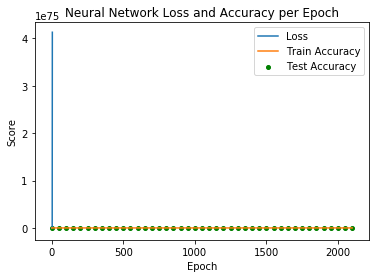

<Figure size 432x288 with 0 Axes>

In [16]:
nn.plotAccPerEpoch("Neural Network Loss and Accuracy per Epoch")

initial w00 7.820877847998791
final w00: nan
change: nan
initial w01 1.003343465075257
final w01: nan
change: nan


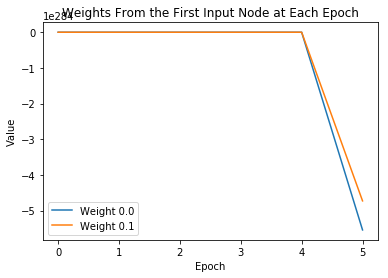

In [17]:
nn.plotSomeWeights()

In [18]:
nn.plotGrads()

beginning
[[ -24.64472642 -102.29692957  821.25017347   39.07271881   36.49075101
    57.22320921    3.90765738   97.01463052  -63.67722264 -127.12736412
    13.86597628  -22.45172158]
 [ -24.64472642 -102.29692957  821.25017347   39.07271881   36.49075101
    57.22320921    3.90765738   97.01463052  -63.67722264 -127.12736412
    13.86597628  -22.45172158]
 [ -24.64472642 -102.29692957  821.25017347   39.07271881   36.49075101
    57.22320921    3.90765738   97.01463052  -63.67722264 -127.12736412
    13.86597628  -22.45172158]
 [ -24.64472642 -102.29692957  821.25017347   39.07271881   36.49075101
    57.22320921    3.90765738   97.01463052  -63.67722264 -127.12736412
    13.86597628  -22.45172158]]
end
[[nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]]


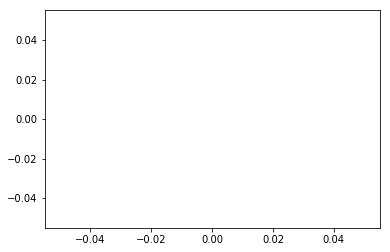

In [19]:
nn.plotBias()